# Load the libraries and the image we are going to use

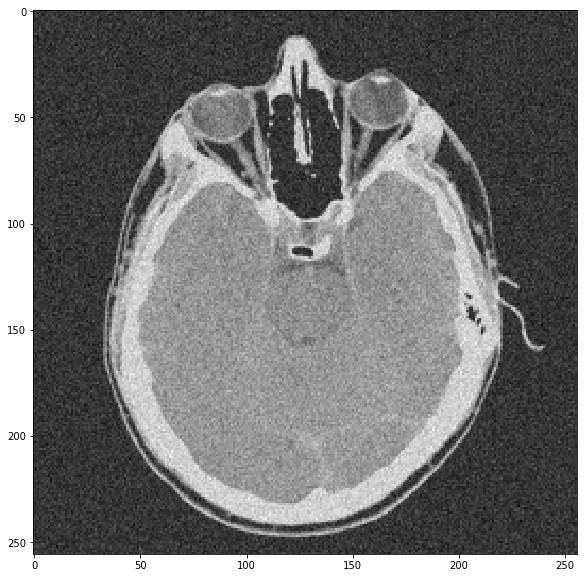

In [1]:
import cv2 
import numpy as np 
import random
from twoDDWT import *


%matplotlib inline 
from matplotlib import pyplot as plt
import pylab 
pylab.rcParams['figure.figsize'] = (10, 10) 

input_image=cv2.imread('data/Fig0726(a).tif',cv2.IMREAD_GRAYSCALE)
input_image = input_image.astype('float64')
plt.imshow(input_image,cmap='gray')

# Let's see the effects of differents filters


## Gaussian blurr

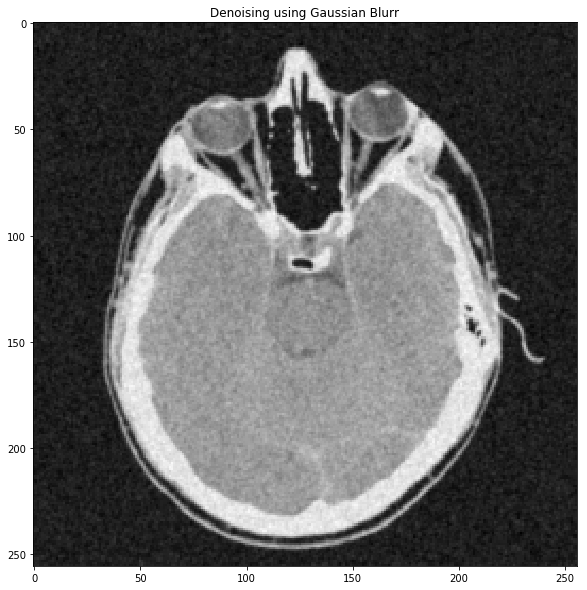

In [11]:
blurred_ = cv2.GaussianBlur(input_image,(0,0),sigmaX = 0.6)
pylab.rcParams['figure.figsize'] = (10, 10) 

plt.imshow(blurred_,cmap='gray')
plt.title("Denoising using Gaussian Blurr")
plt.savefig("data/RMI_flitered_gaussian.png")

## Discrete Wavelet Transform Donoho method

In [3]:
def thresh_donoho(transform_input,scale, typ = "hard"):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        diagonal = np.copy(transform[l//2:l,c//2:c])   #diagonal
        vertical = np.copy(transform[:l//2,c//2:c])    #vertical
        horizontal = np.copy(transform[l//2:l,:c//2])  #horizontal

        
        sigma_diago = np.median(np.abs(diagonal))/0.6745 #Donoho paper
        sigma_verti = np.median(np.abs(vertical))/0.6745
        sigma_hori = np.median(np.abs(horizontal))/0.6745 
        
        length = (l//2) * (c//2)  
        thresh_diago = sigma_diago * np.sqrt(2*np.log10(length))
        thresh_verti = sigma_verti * np.sqrt(2*np.log10(length))
        thresh_hori = sigma_hori * np.sqrt(2*np.log10(length))
        
        
        diagonal[np.abs(diagonal)<thresh_diago] = 0
        vertical[np.abs(vertical)<thresh_verti] = 0
        horizontal[np.abs(horizontal)<thresh_hori] = 0
        
        if typ == "soft":
            diagonal = np.sign(diagonal)*np.abs(diagonal-thresh_diago)
            vertical = np.sign(vertical)*np.abs(vertical-thresh_diago)
            horizontal = np.sign(horizontal)*np.abs(horizontal-thresh_diago)
            
            
        transform[l//2:l,c//2:c] = np.copy(diagonal)
        transform[:l//2,c//2:c] = np.copy(vertical)  
        transform[l//2:l,:c//2] = np.copy(horizontal) 
        
        l = l//2
        c = c//2
        

        
    return transform

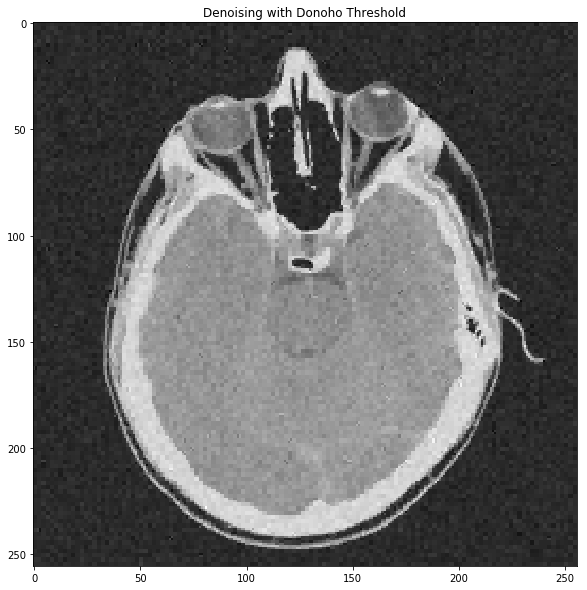

In [8]:
scale = 1
transform = twoDDWT(input_image,scale)
transform_tresh = thresh_donoho(transform,scale)
reconstruct = inverse_twoDDWT(transform_tresh,scale)
plt.imshow(reconstruct,cmap='gray')
plt.title("Denoising with Donoho Threshold")
plt.savefig("data/RMI_Donoho_DWT.png")

# Hard thresholding threshold experimental 

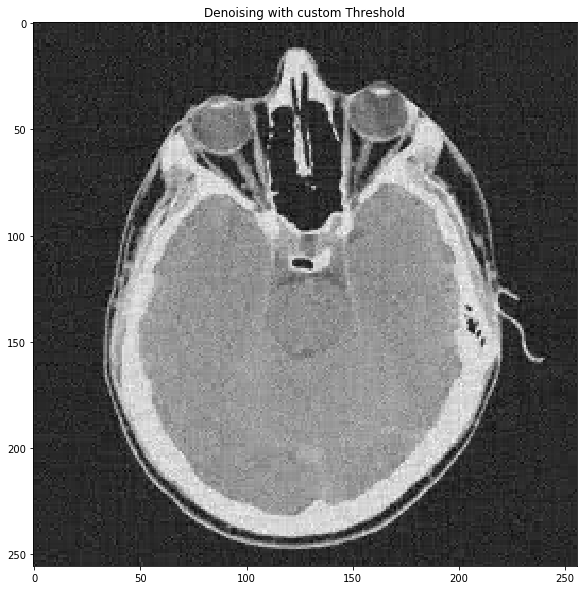

In [10]:
def thresh_detail(transform_input,scale,thresh):
    transform = np.copy(transform_input)
    (l,c) = np.shape(transform)
    for i in range(scale):
        l = l//2
        c = c//2
            
    approx = np.copy(transform[:l,:c])
    transform[np.abs(transform)<thresh] = 0
    transform[:l,:c] = approx
    return transform


scale = 9
thresh = 20
transform = twoDDWT(input_image,scale)
transform_tresh = thresh_detail(transform,scale,thresh)
reconstruct = inverse_twoDDWT(transform_tresh,scale)
plt.imshow(reconstruct,cmap='gray')
plt.title("Denoising with custom Threshold")
plt.savefig("data/RMI_Custom.png")